In [2]:
%env XLA_PYTHON_CLIENT_MEM_FRACTION=0.3

env: XLA_PYTHON_CLIENT_MEM_FRACTION=0.3


In [3]:
%load_ext autoreload

In [5]:
%autoreload

import blackjax
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import numpyro
import nux

In [ ]:
rosenbrock = lambda a, b, x, y: (a - x) ** 2 + b * (y - x**2) ** 2
a = 1
b = 5
logprob = jax.jit(lambda x: rosenbrock(a, b, *x))

In [ ]:
xr = jnp.linspace(-3.0, 3.0, 100)
yr = jnp.linspace(-3.0, 5.0, 100)
xx, yy = jnp.meshgrid(xr, yr)
zz = logprob((xx, yy))

In [ ]:
plt.contour(xx, yy, jnp.log(zz))

In [58]:
step_size = 1e-3
inverse_mass_matrix = jnp.array([1.0, 1.0])
nuts = blackjax.nuts(logprob, step_size, inverse_mass_matrix)

In [59]:
@jax.jit
def step(key, state):
    _, key = jax.random.split(key)
    state, _ = nuts.step(key, state)
    return key, state

In [60]:
key = jax.random.PRNGKey(0)
init_position = jnp.zeros(2)
state = nuts.init(init_position)

In [61]:
samples = []
for i in range(100):
    key, state = step(key, state)
    samples.append(state.position)

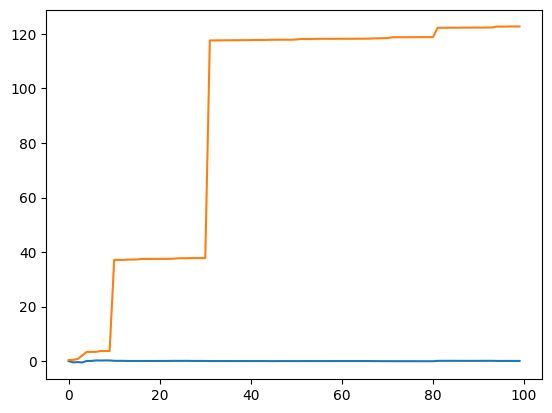

In [62]:
samples = jnp.stack(samples)
plt.plot(samples[:, 0])
plt.plot(samples[:, 1])